In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## LOADING IN THE DATA FROM THE SPREADSHEET

In [2]:
file_path = '/Users/yipho/anes/anes_pre_response/anes_open2025.xlsx'

# V241110 - PRE: What is it that R likes about Democratic Presidential candidate [text]
df_likes_dcan = pd.read_excel(file_path, sheet_name='V241110')
df_likes_dcan['cleaned_response'] = df_likes_dcan['V241110 - PRE: What is it that R likes about Democratic Presidential candidate [text]'].fillna('').astype(str)

# V241112 - PRE: What is it that R dislikes about Democratic Presidential candidate [text]
df_dislikes_dcan = pd.read_excel(file_path, sheet_name='V241112')
df_dislikes_dcan['cleaned_response'] = df_dislikes_dcan['V241112 - PRE: What is it that R dislikes about Democratic Presidential candidate [text]'].fillna('').astype(str)

# V241114 - PRE: What is it that R likes about Republican Presidential candidate [text]
df_likes_rcan = pd.read_excel(file_path, sheet_name='V241114')
df_likes_rcan['cleaned_response'] = df_likes_rcan['V241114 - PRE: What is it that R likes about Republican Presidential candidate [text]'].fillna('').astype(str)

# V241116 - PRE: What is it that R dislikes about Republican Presidential candidate [text]
df_dislikes_rcan = pd.read_excel(file_path, sheet_name='V241116')
df_dislikes_rcan['cleaned_response'] = df_dislikes_rcan['V241116 - PRE: What is it that R dislikes about Republican Presidential candidate [text]'].fillna('').astype(str)

# V241170 - PRE: What does R like about Democratic party [text]
df_likes_dparty = pd.read_excel(file_path, sheet_name='V241170')
df_likes_dparty['cleaned_response'] = df_likes_dparty['V241170 - PRE: What does R like about Democratic party [text]'].fillna('').astype(str)

# V241172 - PRE: What does R dislike about the Democratic party [text]
df_dislikes_dparty = pd.read_excel(file_path, sheet_name='V241172')
df_dislikes_dparty['cleaned_response'] = df_dislikes_dparty['V241172 - PRE: What does R dislike about the Democratic party [text]'].fillna('').astype(str)

# V241174 - PRE: What does R like about Republican party [text]
df_likes_rparty = pd.read_excel(file_path, sheet_name='V241174')
df_likes_rparty['cleaned_response'] = df_likes_rparty['V241174 - PRE: What does R like about Republican party [text]'].fillna('').astype(str)

# V241176 - PRE: What does R dislike about the Republican party [text]
df_dislikes_rparty = pd.read_excel(file_path, sheet_name='V241176')
df_dislikes_rparty['cleaned_response'] = df_dislikes_rparty['V241176 - PRE: What does R dislike about the Republican party [text]'].fillna('').astype(str)

### COMPARISONS BETWEEN DISLIKES AND LIKES OF THE DEMOCRATIC CANDIDATE

In [3]:
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2))
new_stop_words = ['/ae', '/ao', 'ae', '/char', 'char', 'just', 'ao', 'like', 'just', '10']
# Combine the new stop words with the existing ones
combined_stop_words = vectorizer.get_stop_words().union(new_stop_words)
vectorizer.set_params(stop_words=list(combined_stop_words))
# print(vectorizer.get_stop_words())

# TODO also include two word phrases as a part of the counting, e.g. "Donald Trump", but also include one word like Donald and Trump

X_dislikes_dcan = vectorizer.fit_transform(df_dislikes_dcan['cleaned_response'])
bow_df_dl_dcan = pd.DataFrame(X_dislikes_dcan.toarray(), columns=vectorizer.get_feature_names_out())


X_likes_dcan = vectorizer.fit_transform(df_likes_dcan['cleaned_response'])
bow_df_l_dcan = pd.DataFrame(X_likes_dcan.toarray(), columns=vectorizer.get_feature_names_out())

dislikes_sum = bow_df_dl_dcan.sum().sort_values(ascending=False)
likes_sum = bow_df_l_dcan.sum().sort_values(ascending=False)
print(dislikes_sum)
print(likes_sum)

don                229
border             197
think              191
policies           189
president          166
                  ... 
giving rights        1
giving run           1
giving social        1
global epidemic      1
zero years           1
Length: 14816, dtype: int64
trump              319
rights             224
people             221
think              206
woman              186
                  ... 
good mind            1
good moral           1
good orator          1
good outlook         1
zero experience      1
Length: 13859, dtype: int64


### WORD CLOUD IMPLEMENTATION

              Likes  Dislikes
trump         319.0      63.0
rights        224.0      25.0
people        221.0     139.0
think         206.0     191.0
woman         186.0      33.0
donald        149.0      18.0
good          147.0      56.0
women         144.0      20.0
donald trump  144.0      16.0
policies      142.0     189.0
president     127.0     166.0
country       125.0     136.0
class          94.0      22.0
experience     88.0      57.0
abortion       87.0      90.0
better         79.0      17.0
middle         73.0      27.0
person         72.0      29.0
female         67.0       8.0
believe        66.0      59.0


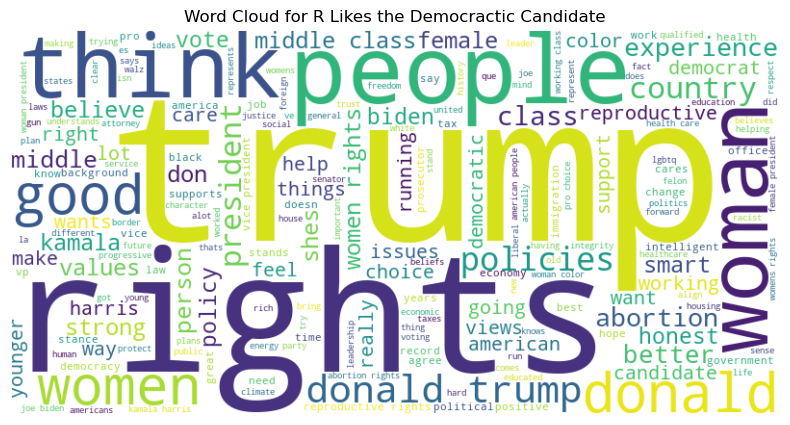

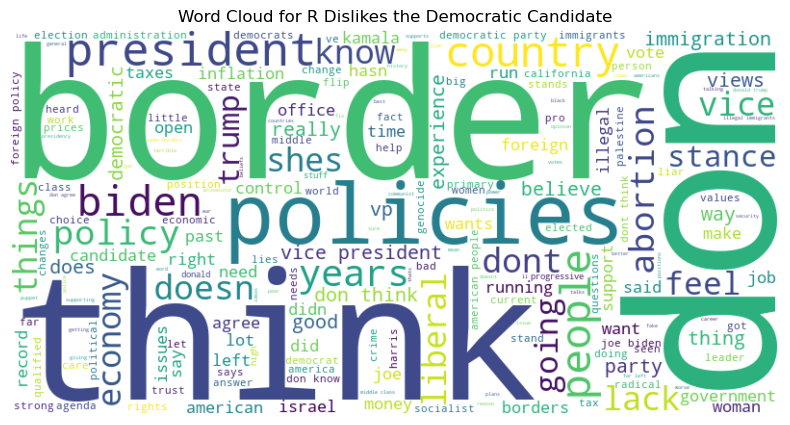

In [4]:
from wordcloud import WordCloud

comparison_df = pd.concat([likes_sum, dislikes_sum], axis=1)
comparison_df.columns = ['Likes', 'Dislikes']

print(comparison_df.sort_values(by='Likes', ascending=False).head(20))
# Generate word cloud for likes
wordcloud_likes = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(likes_sum)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_likes, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for R Likes the Democractic Candidate')
plt.show()

# Generate word cloud for dislikes
wordcloud_dislikes = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dislikes_sum)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_dislikes, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for R Dislikes the Democratic Candidate')
plt.show()


### DISLIKES AND LIKES OF THE DEMOCRATIC PARTY

In [5]:
X_likes_dparty = vectorizer.fit_transform(df_likes_dparty['cleaned_response'])
bow_df_l_dparty = pd.DataFrame(X_likes_dparty.toarray(), columns=vectorizer.get_feature_names_out())

X_dislikes_dparty = vectorizer.fit_transform(df_dislikes_dparty['cleaned_response'])
bow_df_dl_dparty = pd.DataFrame(X_dislikes_dparty.toarray(), columns=vectorizer.get_feature_names_out())

dislikes_sum = bow_df_dl_dparty.sum().sort_values(ascending=False)
likes_sum = bow_df_l_dparty.sum().sort_values(ascending=False)

print(dislikes_sum)
print(likes_sum)


don                    348
people                 298
party                  279
think                  241
policies               191
                      ... 
gets voted               1
gets way                 1
getting accesive         1
getting benefits         1
zionist antisemitic      1
Length: 18953, dtype: int64
people             447
rights             350
party              259
abortion           167
think              165
                  ... 
gobiernan mas        1
gods creatures       1
gods foundation      1
going bto            1
ytry govern          1
Length: 13100, dtype: int64


                  Likes  Dislikes
people            447.0     298.0
rights            350.0      49.0
party             259.0     279.0
abortion          167.0     144.0
think             165.0     241.0
policies          162.0     191.0
class             153.0      45.0
support           151.0      80.0
care              145.0      63.0
women             144.0      13.0
democratic        142.0     121.0
social            140.0      41.0
middle            135.0      48.0
democratic party  119.0      99.0
middle class      105.0      29.0
help              104.0      46.0
good               99.0      54.0
trying             99.0      50.0
right              97.0      70.0
country            92.0     154.0


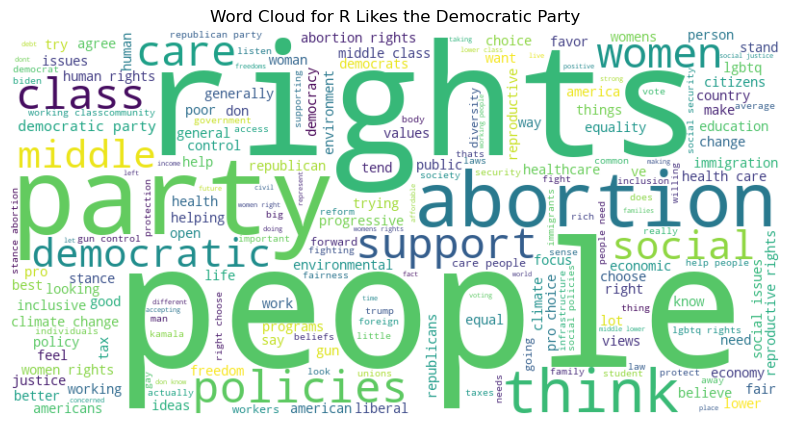

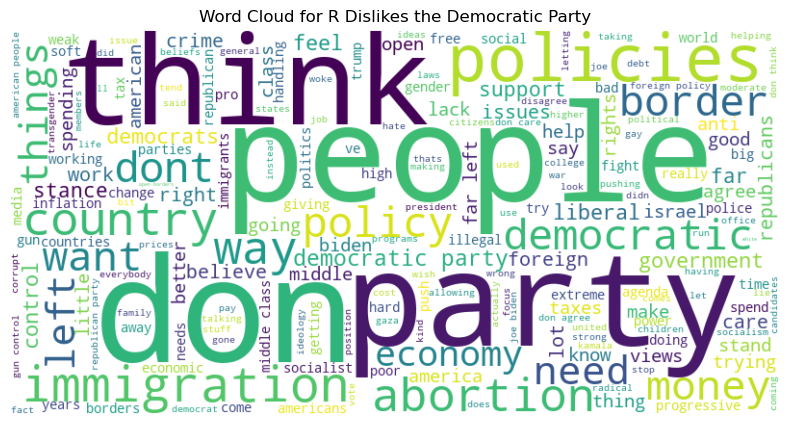

In [6]:
comparison_df = pd.concat([likes_sum, dislikes_sum], axis=1)
comparison_df.columns = ['Likes', 'Dislikes']
print(comparison_df.sort_values(by='Likes', ascending=False).head(20))

wordcloud_likes = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(likes_sum)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_likes, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for R Likes the Democratic Party')
plt.show()


wordcloud_dislikes = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dislikes_sum)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_dislikes, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for R Dislikes the Democratic Party')
plt.show()